In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
df = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score,recall_score ,precision_score,roc_curve,confusion_matrix
from sklearn import metrics

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [5]:
df['target'] = y
print(df)

     sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


### EDA

In [6]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,sepal length,sepal width,petal length,petal width,target
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.ndim

2

In [9]:
df.describe().round(2)

,sepal length,sepal width,petal length,petal width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [10]:
df.sample()

,sepal length,sepal width,petal length,petal width,target
120,6.9,3.2,5.7,2.3,Iris-virginica


In [11]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

In [12]:
df.nunique()

sepal length    35
sepal width     23
petal length    43
petal width     22
target           3
dtype: int64

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [14]:
df['sepal length'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [15]:
df.memory_usage()

Index            132
sepal length    1200
sepal width     1200
petal length    1200
petal width     1200
target          1200
dtype: int64

In [16]:
df.nlargest(5,['sepal length','sepal width'], keep = 'all')

,sepal length,sepal width,petal length,petal width,target
131,7.9,3.8,6.4,2.0,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica


### Correlations

In [17]:
df.corr()

C:\Users\cljon\AppData\Local\Temp\ipykernel_27260\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


C:\Users\cljon\AppData\Local\Temp\ipykernel_27260\1311292019.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df.corr(),annot=True)


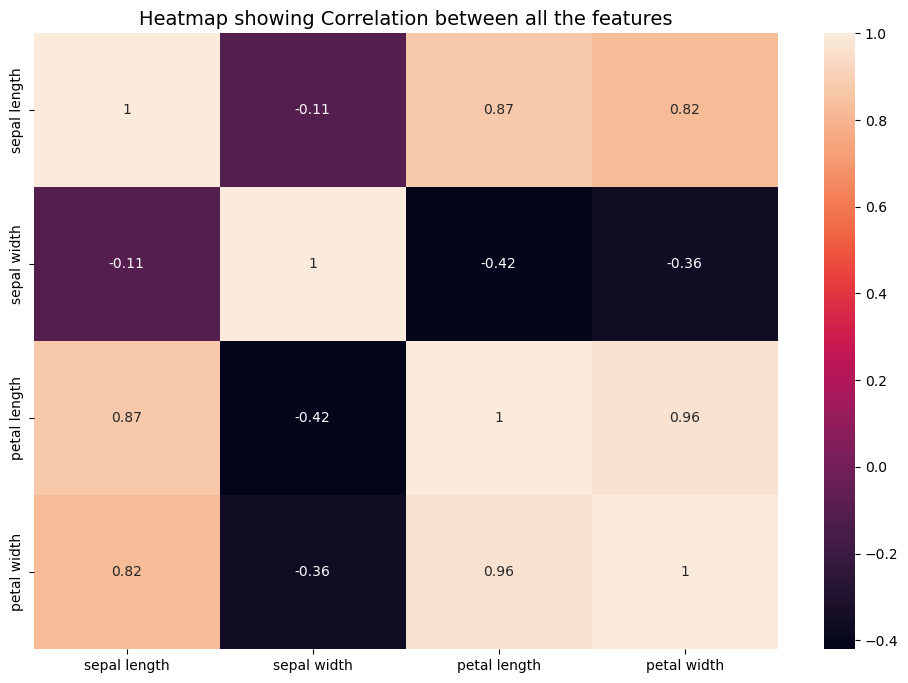

In [18]:
fg,ax=plt.subplots(figsize=(12,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=14)
ax=sns.heatmap(df.corr(),annot=True)

<Axes: >

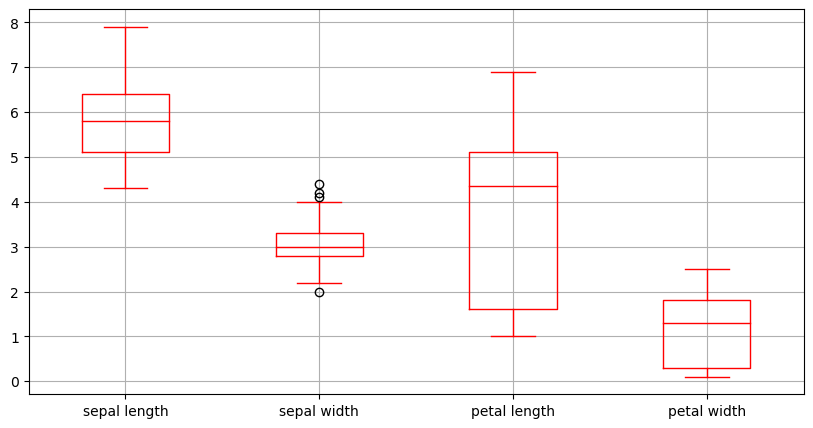

In [19]:
plt.figure(figsize = (10, 5))
df.boxplot(color='red')

In [20]:
sorted(df['sepal width'].unique())

[2.0,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.4]

In [21]:
df.target.replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), (1,2,3), inplace=True)

In [22]:
df1=df[df.target==1]
df2=df[df.target==2]
df3=df[df.target==3]

Text(0.5, 1.0, 'Iris Scatterplot (Iris-setosa and Iris-versicolor)')

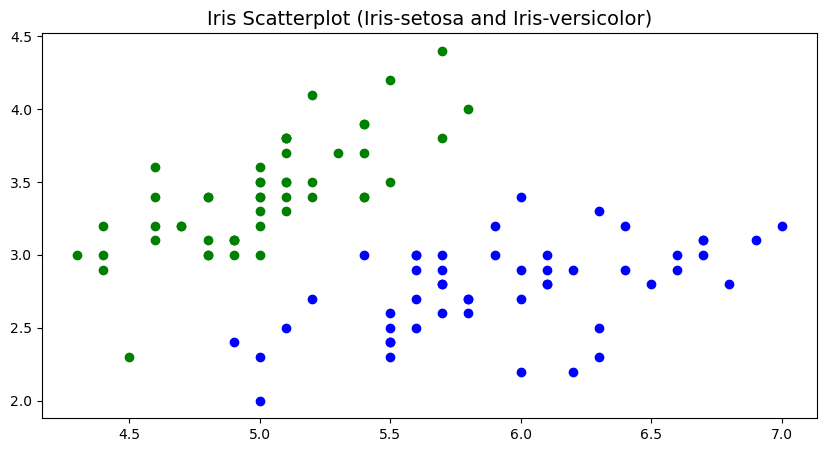

In [23]:
plt.figure(figsize = (10, 5))
plt.scatter(x=df1['sepal length'],y=df1['sepal width'], color='green')
plt.scatter(x=df2['sepal length'],y=df2['sepal width'], color='blue')
plt.title("Iris Scatterplot (Iris-setosa and Iris-versicolor)",fontsize = 14)

Text(0.5, 1.0, 'Iris Scatterplot (Iris-setosa and Iris-virginica)')

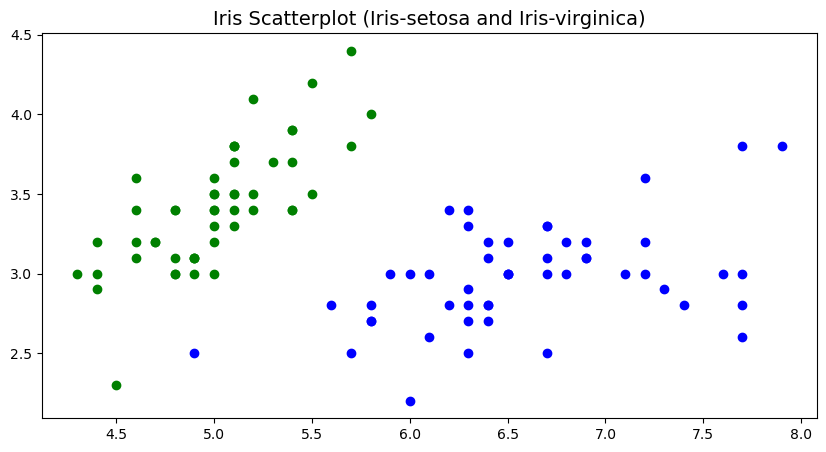

In [24]:
plt.figure(figsize = (10, 5))
plt.scatter(x=df1['sepal length'],y=df1['sepal width'], color='green')
plt.scatter(x=df3['sepal length'],y=df3['sepal width'], color='blue')
plt.title("Iris Scatterplot (Iris-setosa and Iris-virginica)",fontsize = 14)

### Model Building

In [25]:
x = df.drop(['target'],axis='columns')
y = df['target']

In [26]:
print(x.head())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [27]:
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


### Train/Test/Split

In [28]:
#Train/test/split syntax
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)
model = SVC() 
model.fit(x_train,y_train)
model.score(x_test,y_test )

0.9666666666666667

In [29]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.975
test accuracy: 0.9666666666666667


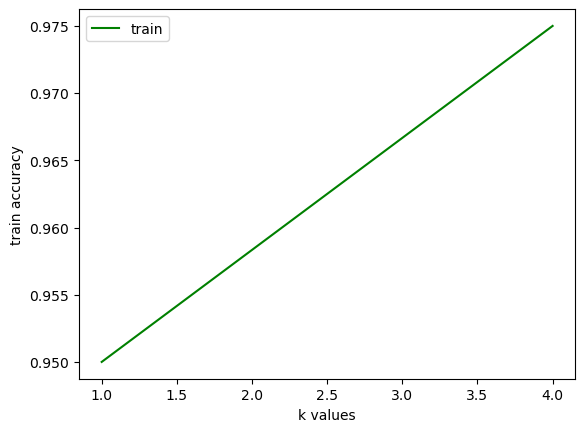

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train = []
k=np.arange(1,5,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(x_train, y_train)
    svm.fit(x_new,y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))   
    
plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

In [31]:
d = {'best features number': k, 'train_score': accuracy_list_train}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.975
max accuracy id: 3


In [32]:
print(" max accuracy values: \n", df.iloc[3])

 max accuracy values: 
 best features number    4.000
train_score             0.975
Name: 3, dtype: float64


In [33]:
selector = SelectKBest(f_classif, k = 4)
x_new = selector.fit_transform(x_train, y_train)
x_new_test=selector.fit_transform(x_test,y_test)
names_train = x_train.columns.values[selector.get_support()]
names_test = x_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['sepal length' 'sepal width' 'petal length' 'petal width']
x test features: ['sepal length' 'sepal width' 'petal length' 'petal width']


In [34]:
#Usimg Grid search for Cross validation
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [35]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_new,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.975
best param:  {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


In [36]:
svm_model=SVC(C=1,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)

In [37]:
svm_model.fit(x_new,y_train)

SVC(C=1, decision_function_shape='ovo', gamma='auto', kernel='linear',
    random_state=1)

In [38]:
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.9916666666666667
test_accuracy:  1.0
